In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

Reading data and storing them in a data frame and displaying the first few lines of the data frame.

In [2]:
df = pd.read_csv('fruit_data_with_colors.csv')
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


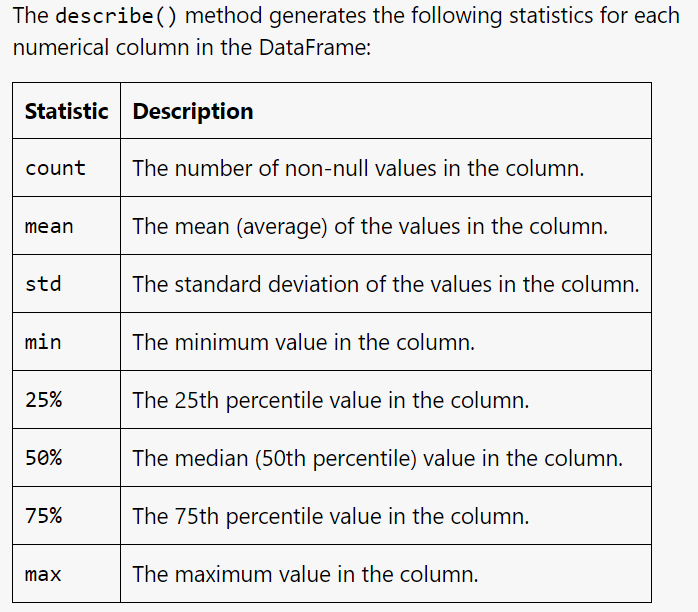

In [3]:
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


Display the number of rows and columns of the data frame related to the data:

In [4]:
print(df.shape)

(59, 7)


These commands displays the number of data in each class and the level of uniformity of data distribution in each class can be checked:

In [5]:
df['fruit_label'].value_counts()


1    19
3    19
4    16
2     5
Name: fruit_label, dtype: int64

In [6]:
df['fruit_name'].value_counts()


apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

<AxesSubplot: >

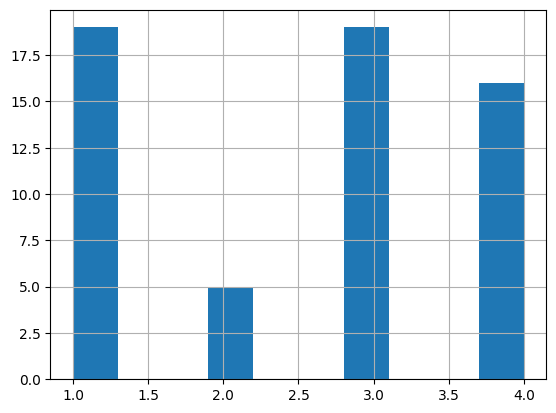

In [7]:
df['fruit_label'].hist()

<AxesSubplot: >

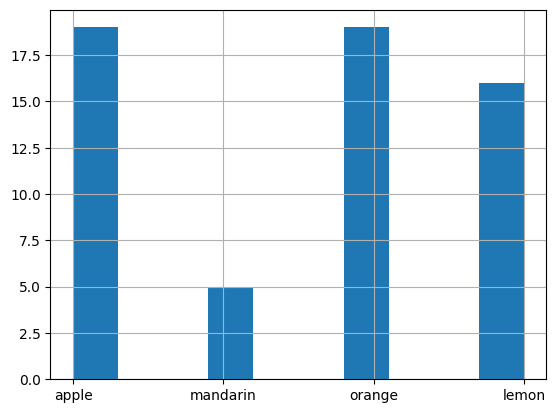

In [8]:
df['fruit_name'].hist()

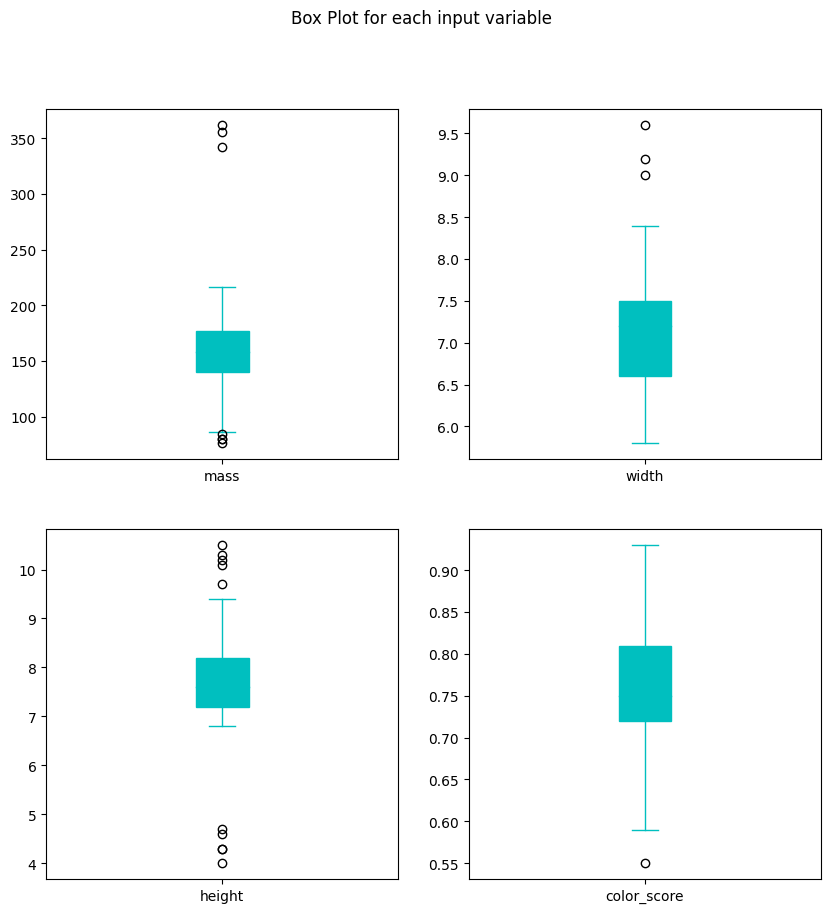

In [9]:
df.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(10,10), color ='c', patch_artist=True)
plt.suptitle("Box Plot for each input variable")
plt.savefig('fruits_boxplot')
plt.show()

In [299]:
#df['fruit_name'].replace(['apple', 'mandarin', 'orange', 'lemon'], [1, 2, 3, 4], inplace=True)
#df['fruit_subtype'].replace(['granny_smith', 'mandarin', 'braeburn', 'golden_delicious','cripps_pink','spanish_jumbo','selected_seconds','turkey_navel','spanish_belsan','unknown'], [1, 2, 3, 4,5,6,7,8,9,10], inplace=True)

Separate data and labels:

In [10]:
x = df[['mass',	'width', 'height', 'color_score']].values
y = df['fruit_label'].values

zero mean and unit variance:

In [11]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))


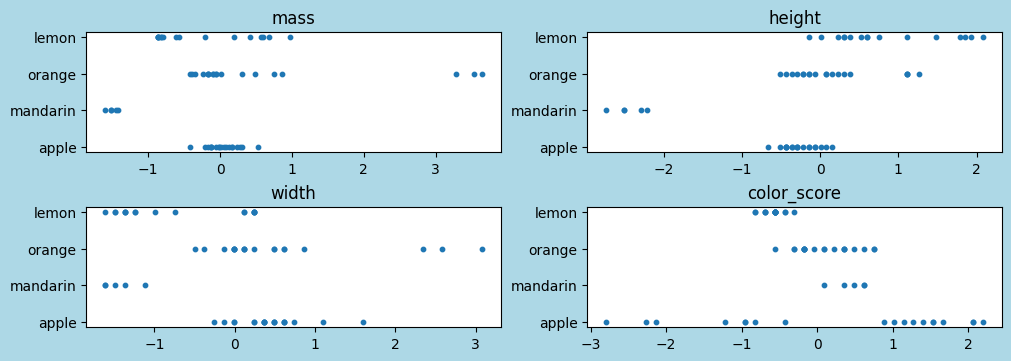

In [302]:
fig, axs = plt.subplots(2, 2,layout="constrained",figsize=(10, 3.5), facecolor='lightblue')
axs[0,0].scatter(x[:,0], df["fruit_name"],s=10)
axs[1,0].scatter(x[:,1],df["fruit_name"],s=10)
axs[0,1].scatter(x[:,2], df["fruit_name"],s=10)
axs[1,1].scatter(x[:,3], df["fruit_name"],s=10)
axs[0,0].title.set_text('mass')
axs[1,0].title.set_text('width')
axs[0,1].title.set_text('height')
axs[1,1].title.set_text('color_score')

array([[<AxesSubplot: title={'center': 'mass'}>,
        <AxesSubplot: title={'center': 'width'}>],
       [<AxesSubplot: title={'center': 'height'}>,
        <AxesSubplot: title={'center': 'color_score'}>]], dtype=object)

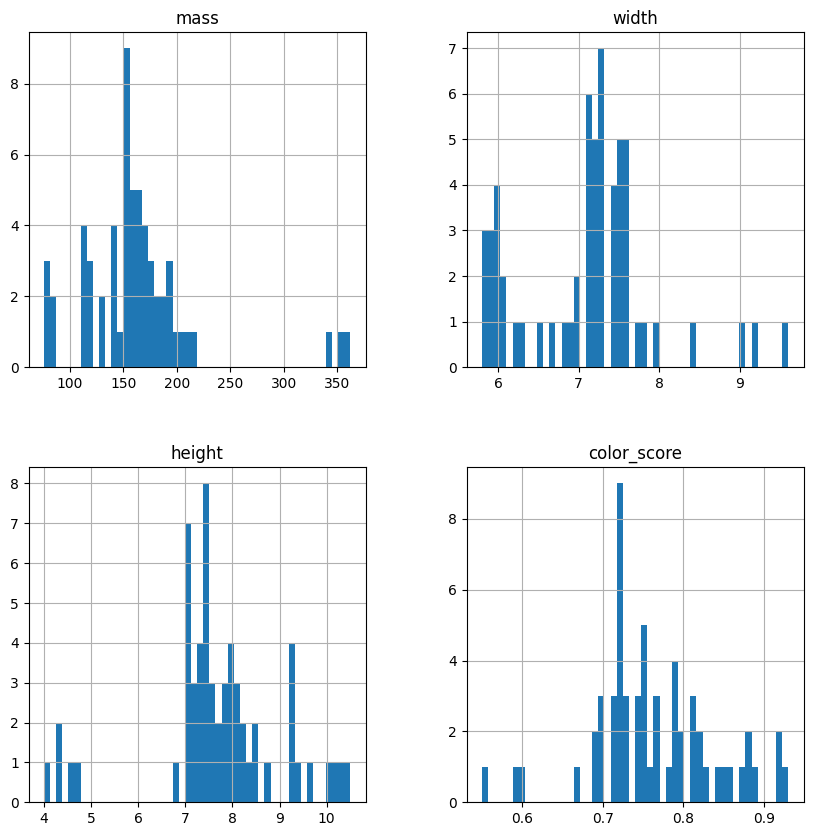

In [12]:
dfx = df[['fruit_name', 'fruit_subtype', 'mass', 'width', 'height', 'color_score']]
dfx.hist(bins=50, ylabelsize=10, xlabelsize=10, figsize=(10,10), legend= False)


c:\Users\Pacific\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:97: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


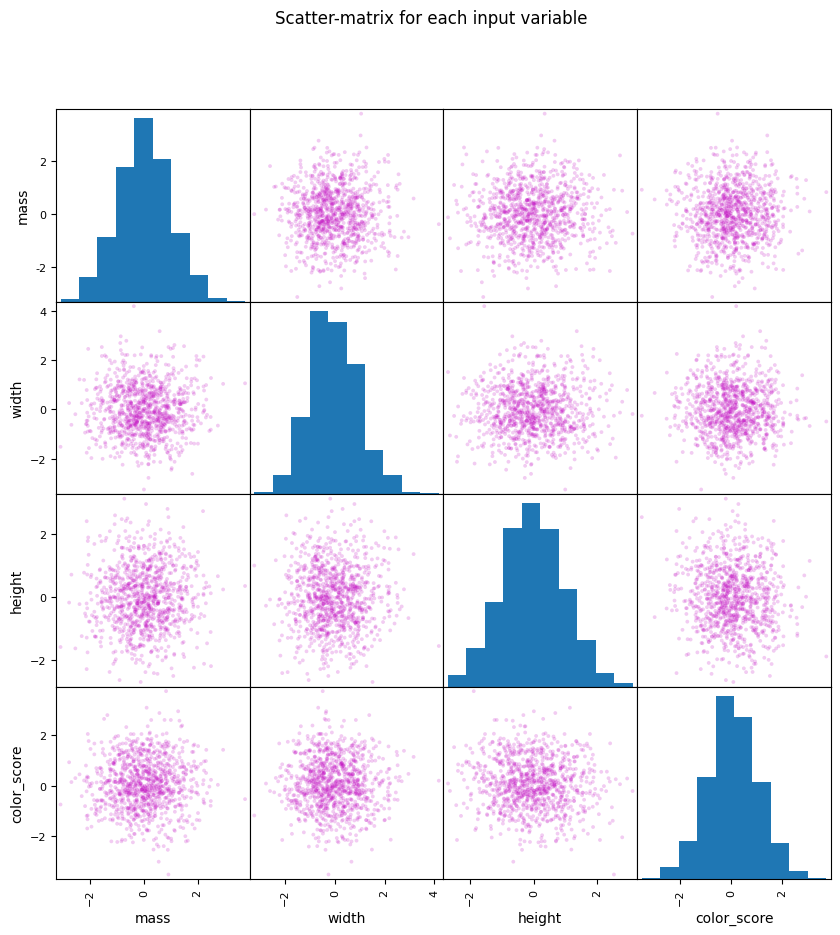

In [13]:
from pandas.plotting import scatter_matrix
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
df = pd.DataFrame(np.random.randn(1000, 4), columns=['mass', 'width', 'height', 'color_score'])
scatter_matrix(df, alpha=0.2, cmap = cmap, figsize=(10,10), marker = '.', s=30, hist_kwds={'bins':10}, range_padding=0.05, color = 'm')
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruit_scatter_matrix')

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print('train set', x_train.shape, y_train.shape)
print('test set', x_test.shape, y_test.shape)

train set (47, 4) (47,)
test set (12, 4) (12,)


In [15]:
from sklearn.neighbors import KNeighborsClassifier

k = 4
model = KNeighborsClassifier(n_neighbors=k)
neigh = model.fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [16]:
cv_error = 1 - cross_val_score(neigh, x_train, y_train, cv=5).mean()
print(f'Average cross-validation error: {cv_error:.4f}')

Average cross-validation error: 0.1711


c:\Users\Pacific\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [17]:
from sklearn import metrics
print('train set accuracy:', metrics.accuracy_score(y_train, neigh.predict(x_train)))
print('test set accuracy:', metrics.accuracy_score(y_test, neigh.predict(x_test)))

train set accuracy: 0.9787234042553191
test set accuracy: 1.0


In [18]:
from sklearn import metrics
kn = 20#len(df['mass'])-30
mean_acc = np.zeros((kn-1))
mean_acc_train = np.zeros((kn-1))
for n in range(1,kn):
  neigh = KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
  yhat=neigh.predict(x_test)
  yhat_train=neigh.predict(x_train)
  mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
  mean_acc_train[n-1] = metrics.accuracy_score(y_train, yhat_train)
mean_acc




array([0.91666667, 0.91666667, 1.        , 1.        , 1.        ,
       0.83333333, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.75      , 0.83333333, 0.75      , 0.83333333,
       0.75      , 0.5       , 0.5       , 0.41666667])

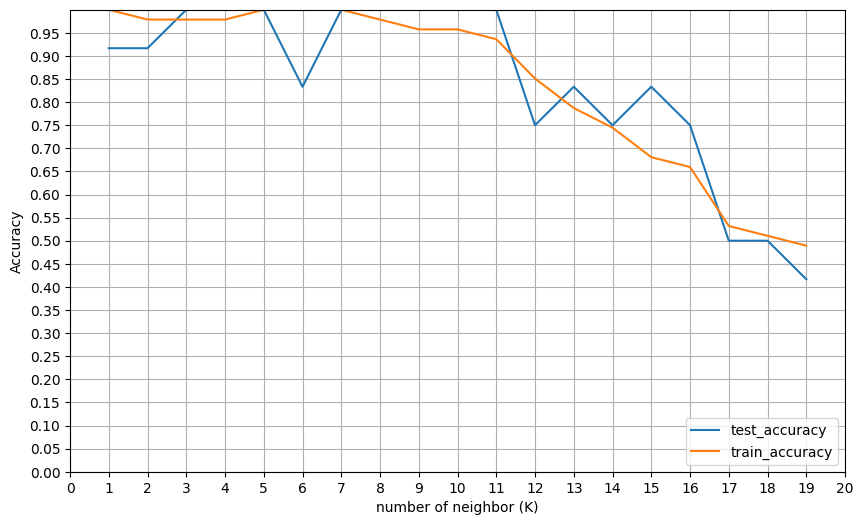

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,kn), mean_acc)
plt.plot(range(1,kn), mean_acc_train)
plt.xlabel('number of neighbor (K)')
plt.ylabel('Accuracy')
plt.legend(["test_accuracy", "train_accuracy"], loc ="lower right")
plt.xlim(0, 20)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 21, step=1))
plt.yticks(np.arange(0, 1, step=0.05))
plt.grid()
plt.show()


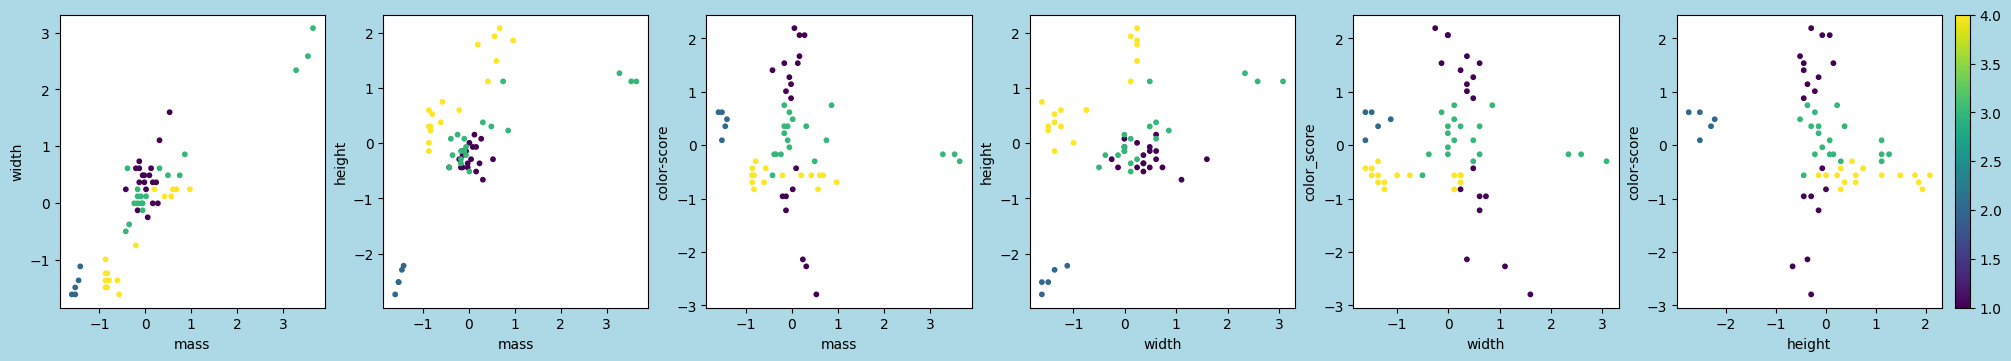

In [20]:
fig, axs = plt.subplots(1,6,layout="constrained",figsize=(20, 3.5), facecolor='lightblue')
axs1 = axs[0].scatter(x[:,0], x[:,1],c= y ,s=10)
axs2 = axs[1].scatter(x[:,0], x[:,2],c= y,s=10)
axs3 = axs[2].scatter(x[:,0], x[:,3],c= y,s=10)
axs4 = axs[3].scatter(x[:,1], x[:,2],c= y,s=10)
axs5 = axs[4].scatter(x[:,1], x[:,3],c= y,s=10)
axs6 = axs[5].scatter(x[:,2], x[:,3],c= y,s=10)
axs[0].set_xlabel('mass')
axs[0].set_ylabel('width')
axs[1].set_xlabel('mass')
axs[1].set_ylabel('height')
axs[2].set_xlabel('mass')
axs[2].set_ylabel('color-score')
axs[3].set_xlabel('width')
axs[3].set_ylabel('height')
axs[4].set_xlabel('width')
axs[4].set_ylabel('color_score')
axs[5].set_xlabel('height')
axs[5].set_ylabel('color-score')
fig.colorbar(axs6)

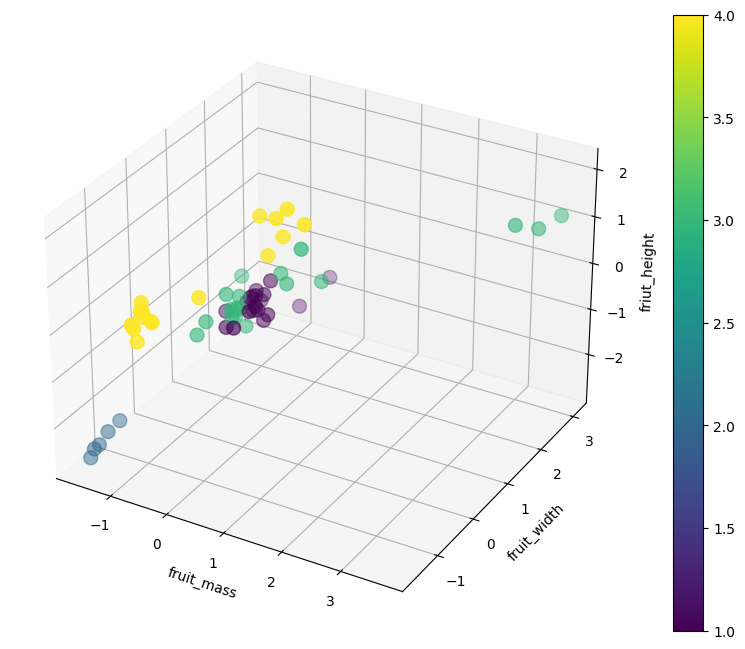

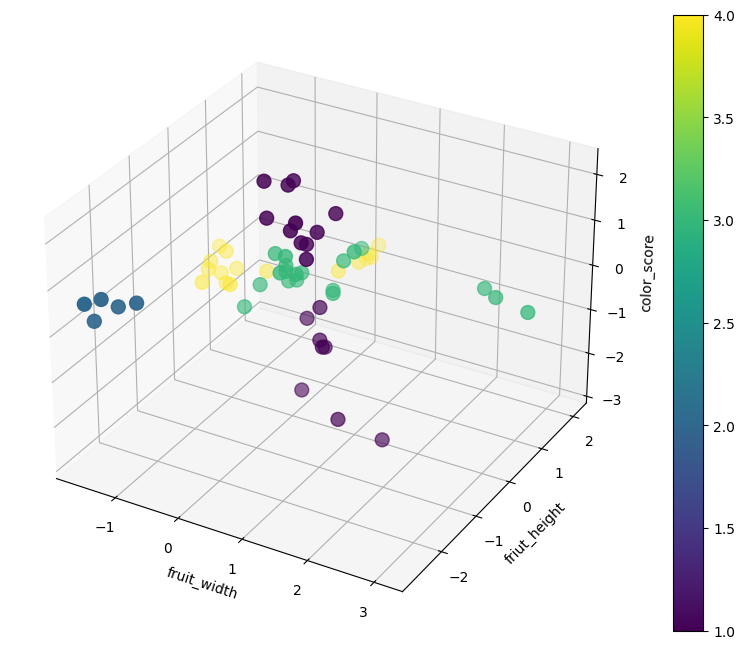

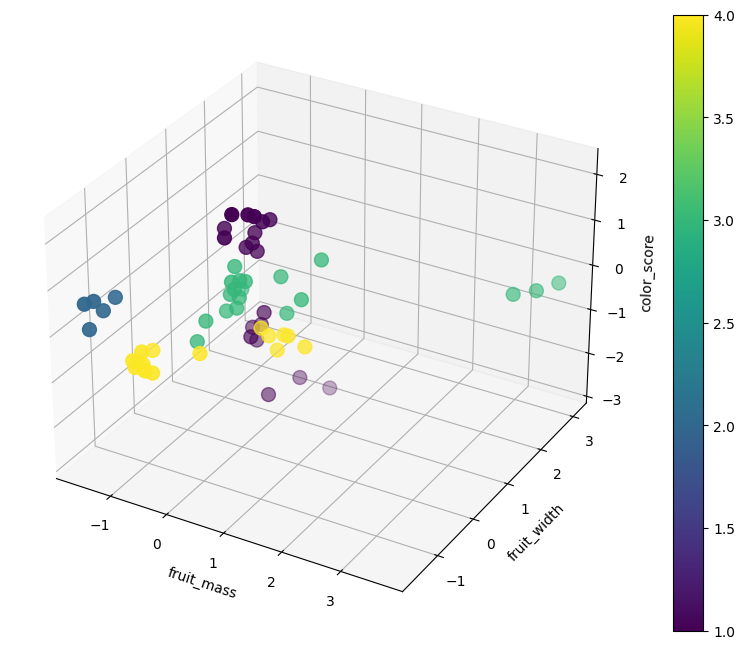

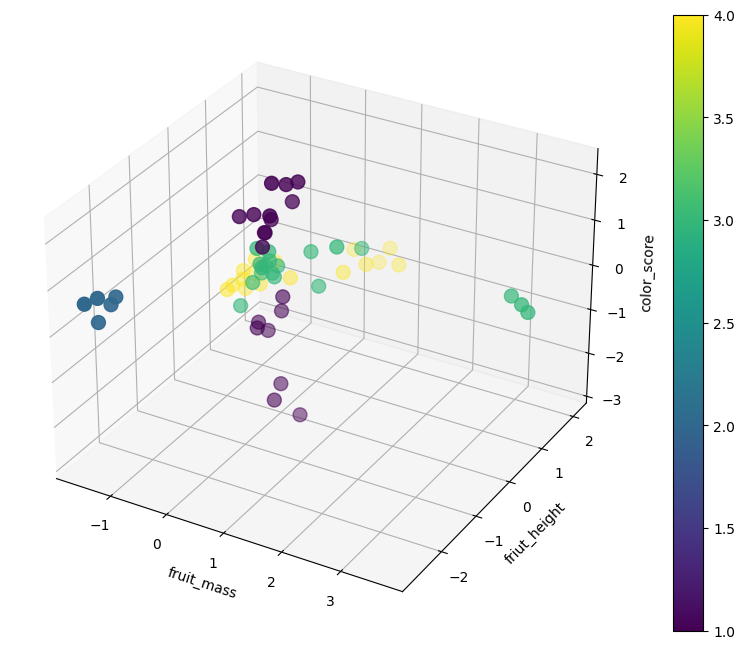

In [22]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
plt_3d = ax.scatter3D(x[:,0], x[:,1], x[:,2], c= y,s=100)
plt.colorbar(plt_3d)
ax.set_xlabel('fruit_mass')
ax.set_ylabel('fruit_width')
ax.set_zlabel('friut_height')
plt.show()

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
plt_3d = ax.scatter3D(x[:,1], x[:,2], x[:,3], c= y,s=100)
plt.colorbar(plt_3d)
ax.set_xlabel('fruit_width')
ax.set_ylabel('friut_height')
ax.set_zlabel('color_score')
plt.show()

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
plt_3d = ax.scatter3D(x[:,0], x[:,1], x[:,3], c= y,s=100)
plt.colorbar(plt_3d)
ax.set_xlabel('fruit_mass')
ax.set_ylabel('fruit_width')
ax.set_zlabel('color_score')
plt.show()

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
plt_3d = ax.scatter3D(x[:,0], x[:,2], x[:,3], c= y,s=100)
plt.colorbar(plt_3d)
ax.set_xlabel('fruit_mass')
ax.set_ylabel('friut_height')
ax.set_zlabel('color_score')
plt.show()

In [27]:
x2 = x[:,2:4]
x1 = x[:, 0:1]
x3 = np.concatenate((x2, x1), axis=1)
#print(x3)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x3, y, test_size=0.2, random_state=0)
print('train set', x_train.shape, y_train.shape)
print('test set', x_test.shape, y_test.shape)

from sklearn.neighbors import KNeighborsClassifier

k = 7
model = KNeighborsClassifier(n_neighbors=k)
neigh = model.fit(x_train,y_train)


from sklearn import metrics
print('train set accuracy:', metrics.accuracy_score(y_train, neigh.predict(x_train)))
print('test set accuracy:', metrics.accuracy_score(y_test, neigh.predict(x_test)))

train set (47, 3) (47,)
test set (12, 3) (12,)
train set accuracy: 0.9787234042553191
test set accuracy: 0.9166666666666666


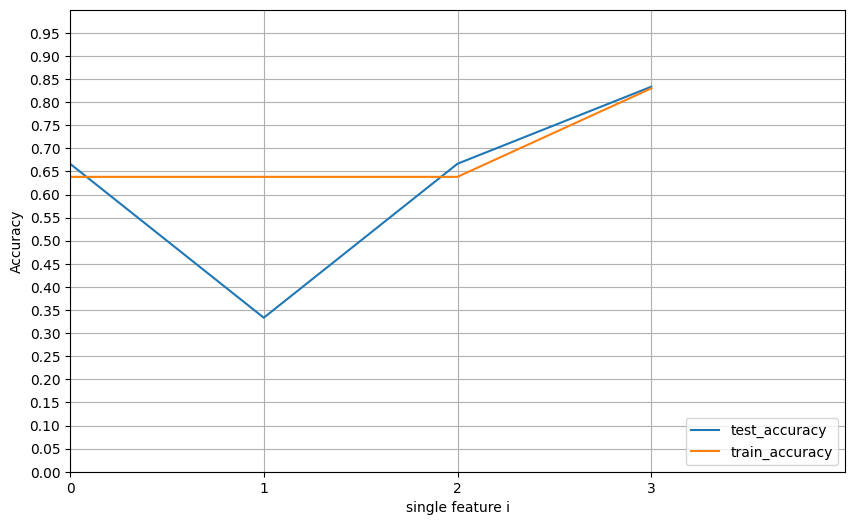

In [314]:
mn = 4
one_acc = np.zeros((mn))
one_acc_train = np.zeros((mn))
for m in range(0,mn):
  xm = x[:,m:(m+1)]

  x_train, x_test, y_train, y_test = train_test_split(xm, y, test_size=0.2, random_state=0)
  neigh = KNeighborsClassifier(n_neighbors=7).fit(x_train, y_train)
  yhat=neigh.predict(x_test)
  yhat_train=neigh.predict(x_train)
  one_acc[m] = metrics.accuracy_score(y_test, yhat)
  one_acc_train[m] = metrics.accuracy_score(y_train, yhat_train)
mean_acc

plt.figure(figsize=(10,6))
plt.plot(range(0,mn), one_acc)
plt.plot(range(0,mn), one_acc_train)
plt.xlabel('single feature i')
plt.ylabel('Accuracy')
plt.legend(["test_accuracy", "train_accuracy"], loc ="lower right")
plt.xlim(0, 4)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 4, step=1))
plt.yticks(np.arange(0, 1, step=0.05))
plt.grid()
plt.show()

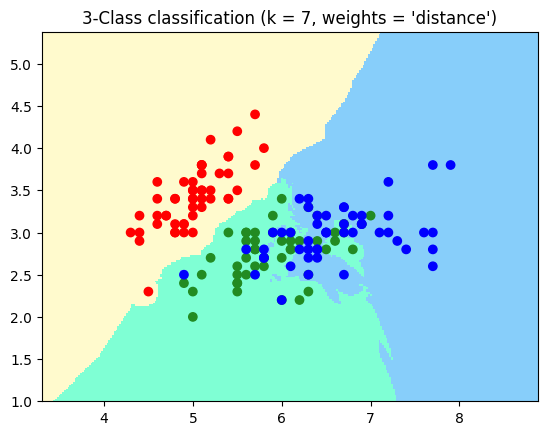

<Figure size 640x480 with 0 Axes>

In [315]:
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
from sklearn import neighbors, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could avoid this ugly slicing by using a two-dim dataset
y = iris.target
h = .02  # step size in the mesh

n_neighbors = 7

# Create color maps
cmap_light = ListedColormap(['#FFFACD', '#7FFFD4', '#87CEFA'])
cmap_bold = ListedColormap(['#FF0000', '#228B22', '#0000FF'])

for weights in ['distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
plt.show()
plt.savefig('classification chart')